In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('airbnb_dataset.csv')

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
anova_model = ols('price ~ C(PO_NAME)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                  sum_sq       df          F  PR(>F)
C(PO_NAME)  5.996007e+08    222.0  11.140585     0.0
Residual    9.510852e+09  39230.0        NaN     NaN


In [18]:
pip install pandas numpy statsmodels geopandas scikit-learn matplotlib

In [20]:
import geopandas as gpd

# Load GeoJSON data
geojson_file = "nyc-zip-code-tabulation-areas-polygons.geojson"
gdf = gpd.read_file(geojson_file)
print(gdf)

     OBJECTID postalCode          PO_NAME STATE    borough ST_FIPS CTY_FIPS  \
0           1      11372  Jackson Heights    NY     Queens      36      081   
1           2      11004        Glen Oaks    NY     Queens      36      081   
2           3      11040    New Hyde Park    NY     Queens      36      081   
3           4      11426        Bellerose    NY     Queens      36      081   
4           5      11365    Fresh Meadows    NY     Queens      36      081   
..        ...        ...              ...   ...        ...     ...      ...   
257       258      10065         New York    NY  Manhattan      36      061   
258       259      10075         New York    NY  Manhattan      36      061   
259       260      10069         New York    NY  Manhattan      36      061   
260       261      10281         New York    NY  Manhattan      36      061   
261       262      10282         New York    NY  Manhattan      36      061   

     BLDGpostalCode    Shape_Leng    Shape_Area  \


C:\Users\aadit\AppData\Local\Temp\ipykernel_4504\1023922242.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['PO_NAME']):


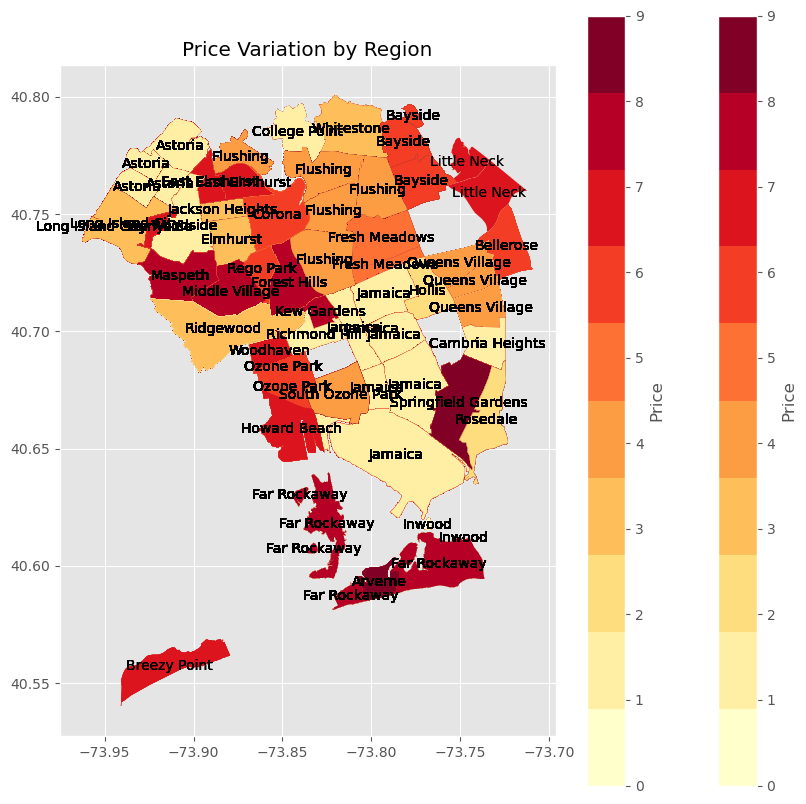

In [21]:
merged_data = gdf.merge(data, on='PO_NAME', how='inner')

# Create a figure and axis for the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Define custom color bins and colormap
num_bins = 10
cmap = plt.get_cmap('YlOrRd', num_bins)  # You can choose other colormaps

# Set the color boundaries based on price percentiles
price_percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
price_values = merged_data['price'].quantile([p / 100 for p in price_percentiles])
merged_data['price_category'] = pd.cut(merged_data['price'], price_values, labels=False, include_lowest=True)

# Plot the data with the defined colormap
merged_data.plot(column='price_category', cmap=cmap, legend=True, ax=ax, legend_kwds={'label': "Price"})
plt.title('Price Variation by Region')

# Add region labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['PO_NAME']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color='black')

# Add a colorbar separately
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(merged_data['price_category'])
cbar = plt.colorbar(sm, ax=ax, ticks=range(num_bins))
cbar.set_label("Price")

# You can further adjust the color scheme, colormaps, and percentile values as needed
plt.show()

In [22]:
data = pd.get_dummies(data, columns=['PO_NAME','neighbourhood_group','latitude'], drop_first=True)



X = data[['PO_NAME', 'neighbourhood_group', 'latitude']]  # Replace with your features
y = data['price']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

# Generate a written output for regression analysis results
print("\nRegression Analysis Results:")
print(f'Mean Squared Error: {mse}')

TypeError: can only concatenate str (not "int") to str